<a href="https://colab.research.google.com/github/shaisabm/Open-Source-AI-Agent/blob/main/AI_Agent.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
! pip install openai groq

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 378.9/378.9 kB 16.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.5/106.5 kB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.4/76.4 kB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 318.9/318.9 kB 10.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 2.4 MB/s eta 0:00:00


In [ ]:
from openai import OpenAI
from google.colab import userdata
import os
import json
from groq import Groq
import json
from typing import List, Dict, Any, Callable
import ast
import io
import sys

In [ ]:
groq_api_key = userdata.get("GROQ_API_KEY")
os.environ['GROQ_API_KEY'] = groq_api_key

openrouter_api_key = userdata.get("OPENROUTER_API_KEY")
os.environ['OPENROUTER_API_KEY'] = openrouter_api_key

openai_api_key = userdata.get("OPENAI_API_KEY")
os.environ['OPENAI_API_KEY'] = openai_api_key

groq_client = Groq(api_key=os.getenv('GROQ_API_KEY'))

openrouter_client = OpenAI(
    base_url="https://openrouter.ai/api/v1",
    api_key=os.getenv("OPENROUTER_API_KEY")
)

openai_client = OpenAI(
    base_url="https://api.openai.com/v1",
    api_key=os.getenv("OPENAI_API_KEY")
)

In [ ]:
def get_llm_response(client, prompt, openai_model="o1-preview", json_mode=False):

    if client == "openai":

        kwargs = {
            "model": openai_model,
            "messages": [{"role": "user", "content": prompt}]
        }

        if json_mode:
            kwargs["response_format"] = {"type": "json_object"}

        response = openai_client.chat.completions.create(**kwargs)

    elif client == "groq":

        try:
            models = ["llama-3.1-8b-instant", "llama-3.1-70b-versatile", "llama3-70b-8192", "llama3-8b-8192", "gemma2-9b-it"]

            for model in models:

                try:
                    kwargs = {
                        "model": model,
                        "messages": [{"role": "user", "content": prompt}]
                    }
                    if json_mode:
                        kwargs["response_format"] = {"type": "json_object"}

                    response = groq_client.chat.completions.create(**kwargs)

                    break

                except Exception as e:
                    print(f"Error: {e}")
                    continue

        except Exception as e:
            print(f"Error: {e}")

            kwargs = {
                "model": "meta-llama/llama-3.1-8b-instruct:free",
                "messages": [{"role": "user", "content": prompt}]
            }

            if json_mode:
                kwargs["response_format"] = {"type": "json_object"}

            response = openrouter_client.chat.completions.create(**kwargs)

    else:
        raise ValueError(f"Invalid client: {client}")

    return response.choices[0].message.content


def evaluate_responses(prompt, reasoning_prompt=False, openai_model="o1-preview"):

    if reasoning_prompt:
        prompt = f"{prompt}\n\n{reasoning_prompt}."

    openai_response = get_llm_response("openai", prompt, openai_model)
    groq_response = get_llm_response("groq", prompt)

    print(f"OpenAI Response: {openai_response}")
    print(f"\n\nGroq Response: {groq_response}")

In [ ]:
prompt = str(input("Enter your prompt: "))
print("Available clients.\nGroq\nOpenAi")

client = str(input("Choose your client: ")).lower()

get_llm_response(client, prompt)

Enter your prompt: count 4 through 9
Available clients.
Groq
OpenAi
Choose your client: groq


"To count 4 through 9, here's the sequence: \n\n4, 5, 6, 7, 8, 9."

#Agent Architecture


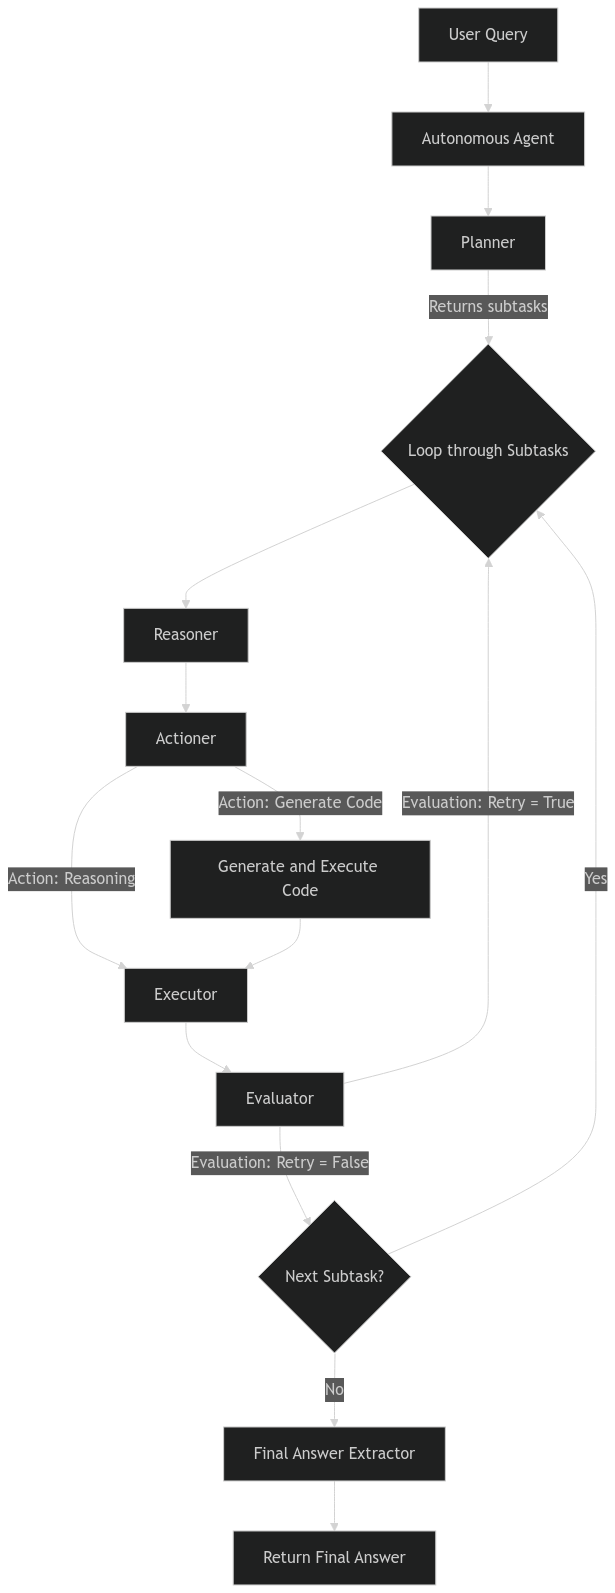


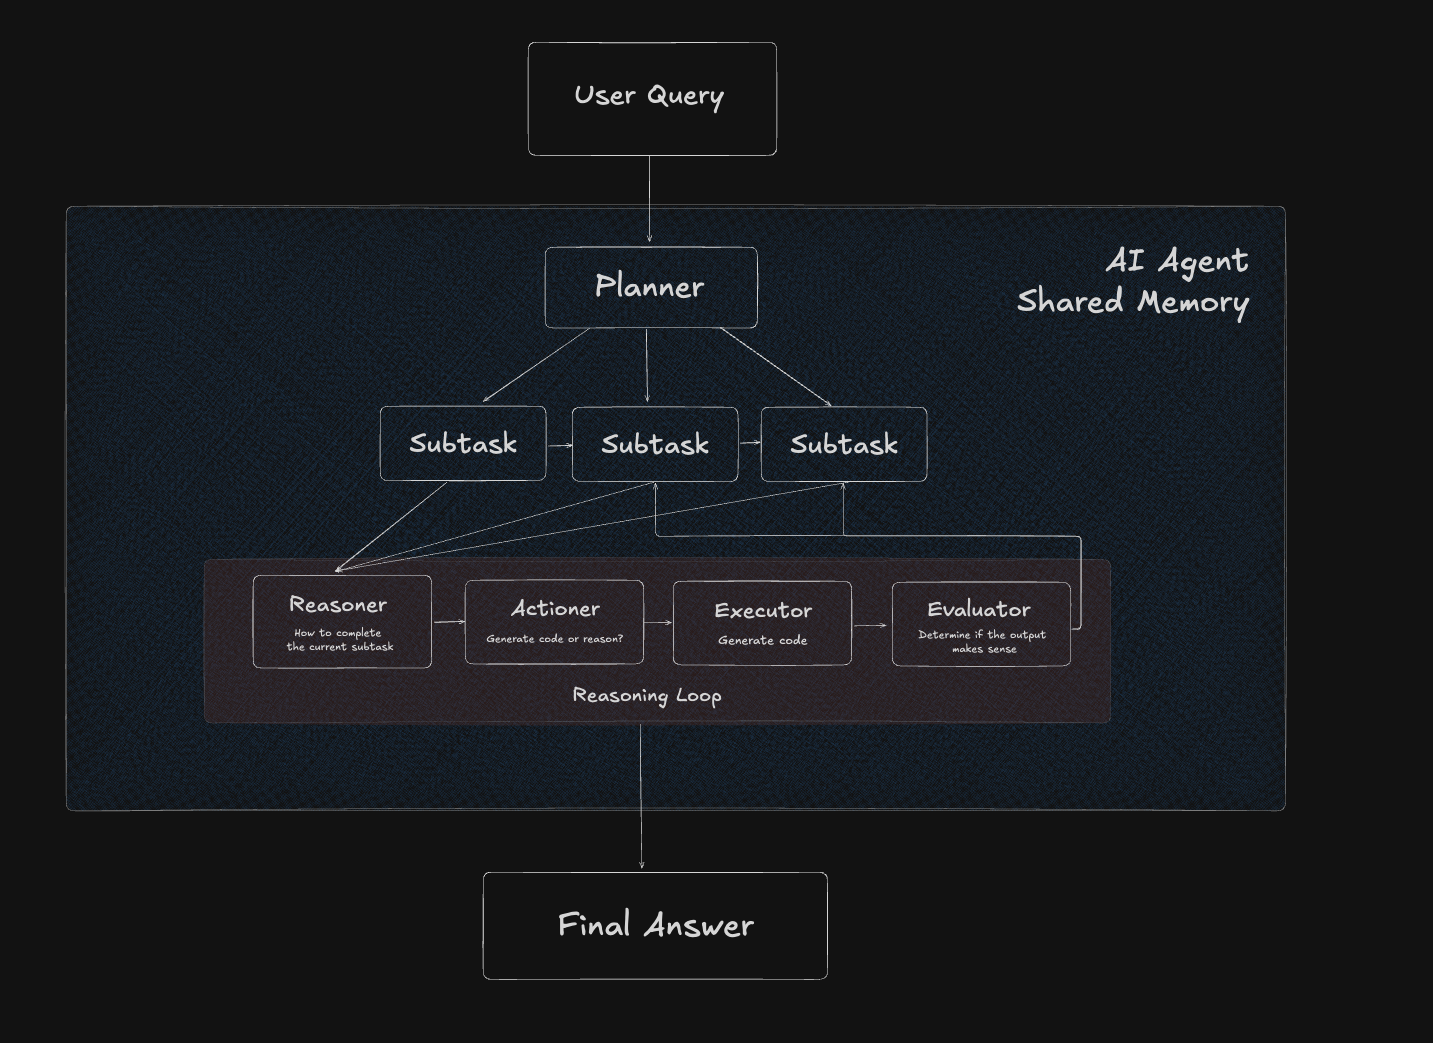